# Задание 1.3.1

Расстояния Евклида: [0.0, 3.7416573867739413, 3.7416573867739413, 6.928203230275509]
Квадраты Евклидовых расстояний: [0.0, 14.0, 14.0, 47.99999999999999]
Расстояния Чебышева: [0, 3, 3, 4]
Расстояния Хэмминга: [0, 3, 3, 3]


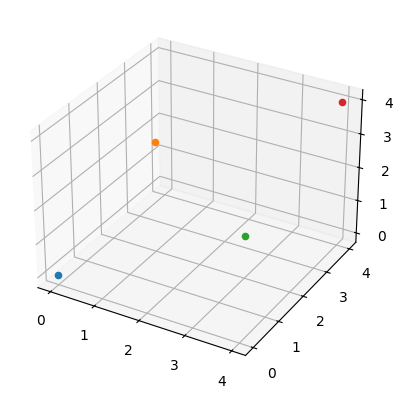

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Создание точек
points = np.array([[0, 0, 0], [1, 2, 3], [3, 2, 1], [4, 4, 4]])

# Расстояние Евклида
euclidean_distances = [np.linalg.norm(points[0] - point) for point in points]

# Квадрат Евклидова расстояния
euclidean_distances_squared = [np.linalg.norm(points[0] - point) ** 2 for point in points]

# Расстояние Чебышева
chebyshev_distances = [np.abs(points[0] - point).max() for point in points]

# Расстояние Хэмминга
hamming_distances = [np.count_nonzero(points[0] != point) for point in points]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for point in points:
    ax.scatter(point[0], point[1], point[2])

print("Расстояния Евклида:", euclidean_distances)
print("Квадраты Евклидовых расстояний:", euclidean_distances_squared)
print("Расстояния Чебышева:", chebyshev_distances)
print("Расстояния Хэмминга:", hamming_distances)

plt.show()


# Задание 1.3.2

In [7]:
m = np.zeros((5, 5))
m += np.arange(5)
print(m)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# Задание 2.3.1

Accuracy (k=1): 0.957


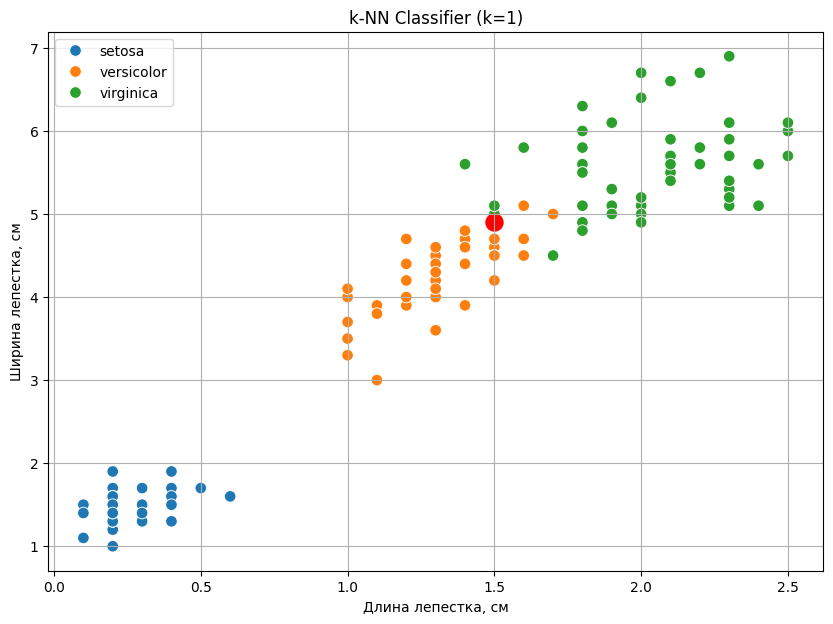

Accuracy (k=5): 0.957


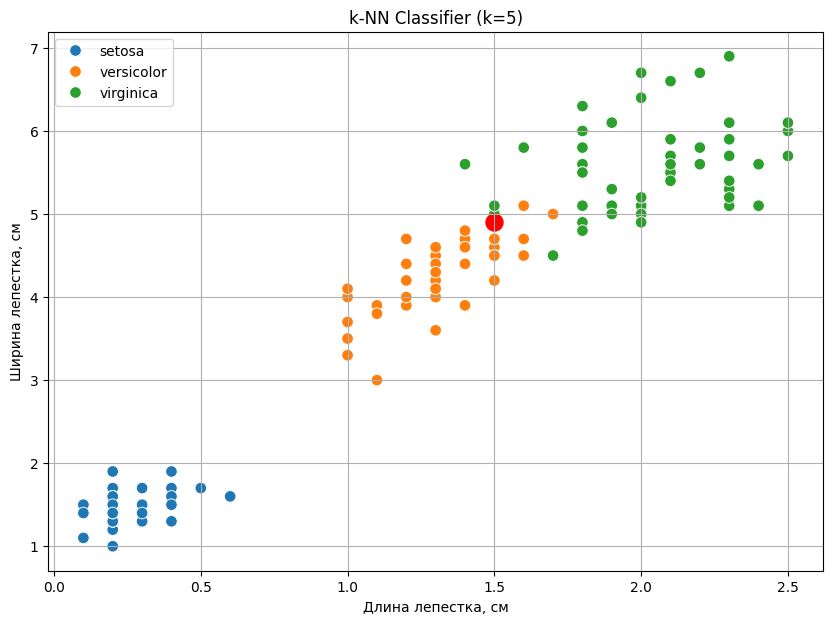

Accuracy (k=10): 1.0


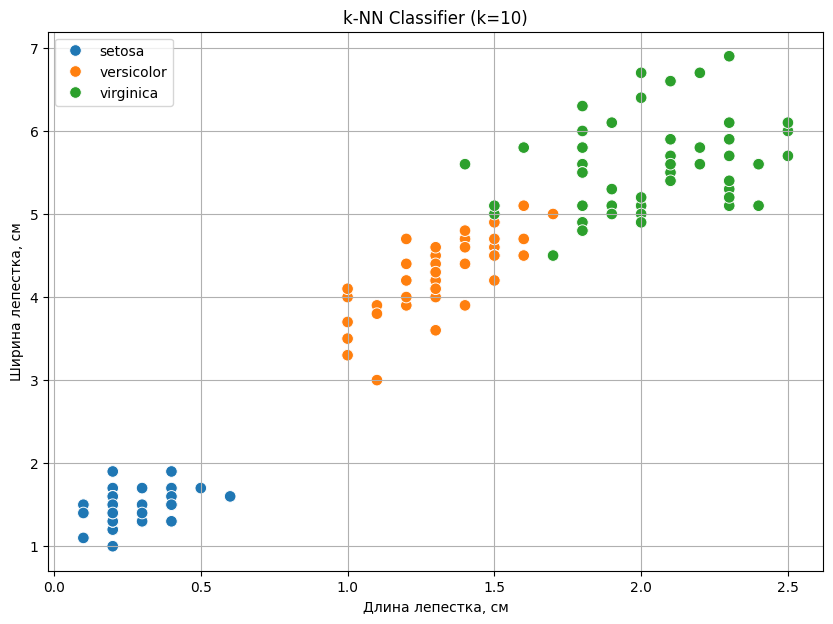

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd

iris = sns.load_dataset('iris')
iris

# Исходные данные
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

# Эксперимент 1: Разное количество ближайших соседей
k_values = [1, 5, 10]
for k in k_values:
    # Разделение данных на обучающую и тестовую выборки (15%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=35)
    
    # Обучение модели с текущим значением k
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Получение предсказаний модели
    y_pred = model.predict(X_test)
    
    # Оценка качества модели и вывод результатов
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy (k={k}): {accuracy:.3}')
    
    # Подсветка неправильно классифицированных точек на графике
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel("Длина лепестка, см")
    plt.ylabel("Ширина лепестка, см")
    plt.legend(loc=2)
    plt.grid()
    
    for i in range(len(y_test)):
        if y_test.iloc[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color="red", s=150)
    
    plt.title(f'k-NN Classifier (k={k})')
    plt.show()


# Задание 3.3.2

In [11]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

# Создание DataFrame с информацией о цвете глаз и волос
data = {
    'Цвет глаз': ['голубой', 'зеленый', 'карий', 'голубой'],
    'Цвет волос': ['шатен', 'рыжий', 'блонд', 'шатен']
}

# Преобразование словаря в DataFrame
df = pd.DataFrame(data)

# Преобразование DataFrame в список словарей
data_dict = df.to_dict(orient='records')

dictvectorizer = DictVectorizer(sparse=False)

features = dictvectorizer.fit_transform(data_dict)

print(features)

[[0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0.]]
